# 算法原理

1．分类决策树模型是表示基于特征对实例进行分类的树形结构。决策树可以转换成一个**if-then**规则的集合，也可以看作是定义在特征空间划分上的类的条件概率分布。

2．决策树学习旨在构建一个与训练数据拟合很好，并且复杂度小的决策树。因为从可能的决策树中直接选取最优决策树是NP完全问题。现实中采用启发式方法学习次优的决策树。

决策树学习算法包括3部分：特征选择、树的生成和树的剪枝。常用的算法有ID3、
C4.5和CART。

3．特征选择的目的在于选取对训练数据能够分类的特征。特征选择的关键是其准则。常用的准则如下：

（1）样本集合$D$对特征$A$的信息增益（ID3）


$$g(D, A)=H(D)-H(D|A)$$

$$H(D)=-\sum_{k=1}^{K} \frac{\left|C_{k}\right|}{|D|} \log _{2} \frac{\left|C_{k}\right|}{|D|}$$

$$H(D | A)=\sum_{i=1}^{n} \frac{\left|D_{i}\right|}{|D|} H\left(D_{i}\right)$$

其中，$H(D)$是数据集$D$的熵，$H(D_i)$是数据集$D_i$的熵，$H(D|A)$是数据集$D$对特征$A$的条件熵。	$D_i$是$D$中特征$A$取第$i$个值的样本子集，$C_k$是$D$中属于第$k$类的样本子集。$n$是特征$A$取 值的个数，$K$是类的个数。

（2）样本集合$D$对特征$A$的信息增益比（C4.5）


$$g_{R}(D, A)=\frac{g(D, A)}{H(D)}$$


其中，$g(D,A)$是信息增益，$H(D)$是数据集$D$的熵。

（3）样本集合$D$的基尼指数（CART）

$$\operatorname{Gini}(D)=1-\sum_{k=1}^{K}\left(\frac{\left|C_{k}\right|}{|D|}\right)^{2}$$

特征$A$条件下集合$D$的基尼指数：

 $$\operatorname{Gini}(D, A)=\frac{\left|D_{1}\right|}{|D|} \operatorname{Gini}\left(D_{1}\right)+\frac{\left|D_{2}\right|}{|D|} \operatorname{Gini}\left(D_{2}\right)$$
 
4．决策树的生成。通常使用信息增益最大、信息增益比最大或基尼指数最小作为特征选择的准则。决策树的生成往往通过计算信息增益或其他指标，从根结点开始，递归地产生决策树。这相当于用信息增益或其他准则不断地选取局部最优的特征，或将训练集分割为能够基本正确分类的子集。

5．决策树的剪枝。由于生成的决策树存在过拟合问题，需要对它进行剪枝，以简化学到的决策树。决策树的剪枝，往往从已生成的树上剪掉一些叶结点或叶结点以上的子树，并将其父结点或根结点作为新的叶结点，从而简化生成的决策树。


# 数据准备

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 决策树
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#读取数据
data = pd.read_csv("../data/iris.csv")
print(data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
#准备数据
data = data.dropna()
y = data['Species'].apply(lambda x: 1 if x == 'setosa' else 2 if x == 'versicolor' else 3)
x = data.drop(['Species'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

# 模型训练

In [5]:
# 分类模型、参数
model = DecisionTreeClassifier(random_state = 0)
param_grid = {'max_depth': [5, 10, 15]}

# GridSearchCV优化参数、训练模型，带交叉验证的网格搜索，默认为5折
gsearch = GridSearchCV(model, param_grid, cv=5)
model = gsearch.fit(x_train, y_train)

# 打印最优结果
print('DecisionTree params:', model.best_estimator_)

DecisionTree params: DecisionTreeClassifier(max_depth=10, random_state=0)


In [5]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train, y_train)
dt.feature_importances_ # 特征重要性

array([0.        , 0.01787567, 0.41581891, 0.56630542])

Text(0, 0.5, 'Feature')

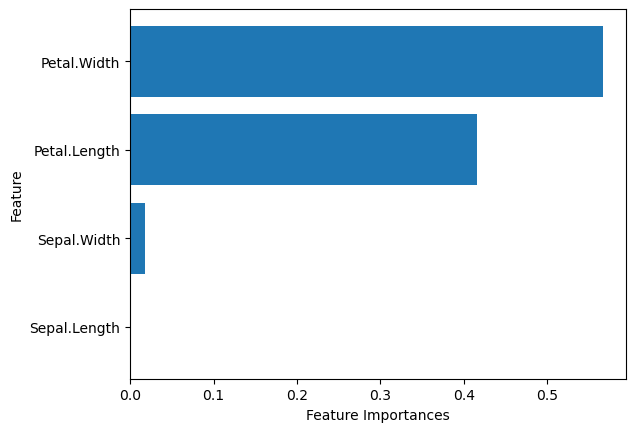

In [9]:
can = {n:v for n,v in zip(data.columns,dt.feature_importances_)}
plt.barh(list(can.keys()),list(can.values()),align = 'center')
plt.xlabel("Feature Importances")
plt.ylabel("Feature")

# 模型保存

In [5]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../test/best_models/dt.pkl')

# 加载模型
model = joblib.load('../test/best_models/dt.pkl')

In [6]:
# 法二
import pickle

with open('../test/best_models/dt.pkl', 'wb') as f:
    pickle.dump(model, f)
    
# 读取Model
with open('../test/best_models/dt.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [7]:
prediction = model.predict(x_test)

In [8]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 1.0


In [9]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

